In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import ast
from collections import Counter
import itertools

In [2]:
df = pd.read_csv("data/combined_ratings.csv", low_memory=False)

In [3]:
df

,User-ID,ISBN,Book-Rating,bookId,title,series,author,rating,description,language,...,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
0,276746,0425115801,0,32424.Lightning,Lightning,NaN,Dean Koontz (Goodreads Author),4.06,A storm struck on the night Laura Shane was bo...,English,...,56841,"['21680', '20556', '11771', '2152', '682']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,2202,28,5.16,1996,Berkley Publishing Group
1,276746,055356451X,0,84846.Night_Sins,Night Sins,Deer Lake #1,Tami Hoag (Goodreads Author),3.96,A sensational New York Times bestseller and su...,English,...,10792,"['3593', '4088', '2413', '510', '188']",94.0,['Minnesota (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,65,1,NaN,1995,Bantam
2,276747,0060517794,9,6697.Little_Altars_Everywhere,Little Altars Everywhere,Ya Yas #2,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,English,...,28611,"['5414', '9475', '10279', '2874', '569']",88.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,476,8,3.39,2003,HarperTorch
3,276747,0671537458,9,122212.Waiting_to_Exhale,Waiting to Exhale,Waiting To Exhale #1,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,English,...,14718,"['5212', '5110', '3440', '742', '214']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,95,1,0.89,1995,Pocket
4,276747,0679776818,8,6259.Birdsong,Birdsong: A Novel of Love and War,French Trilogy #2,Sebastian Faulks,4.09,Published to international critical and popula...,English,...,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,"['France', 'London, England']",https://i.gr-assets.com/images/S/compressed.ph...,6741,90,3.33,1997,Vintage Books USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149309,276690,0312970188,0,1428043.The_Astronaut_s_Wife,The Astronaut's Wife,NaN,Robert Tine,3.65,In this relentlessly gripping psychological th...,English,...,2078,"['540', '606', '671', '191', '70']",87.0,[],https://i.gr-assets.com/images/S/compressed.ph...,78,1,3.07,1999,St. Martin's Press
149310,276690,0440439884,0,41044096-island-of-the-blue-dolphins,Island of the Blue Dolphins,Island of the Blue Dolphins #1,Scott O'Dell,3.84,In the Pacific there is an island that looks l...,English,...,291629,"['94509', '95477', '70357', '21647', '9639']",89.0,"['Island of the Blue Dolphins', 'California (U...",https://i.gr-assets.com/images/S/compressed.ph...,49491,638,NaN,1971,Random House Children's Books
149311,276704,0441007813,0,190361.Obsidian_Butterfly,Obsidian Butterfly,"Anita Blake, Vampire Hunter #9",Laurell K. Hamilton (Goodreads Author),4.09,"The Anita Blake, Vampire Hunter backlist takes...",English,...,60100,"['25976', '18652', '11208', '3196', '1068']",93.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,2141,30,5.32,2000,Ace Books
149312,276704,0446605409,0,33810.Plum_Island,Plum Island,John Corey #1,Nelson DeMille (Goodreads Author),4.03,The hair-raising suspense of The General's Dau...,English,...,45617,"['15388', '19254', '8662', '1692', '621']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,991,12,3.82,1998,Warner Books


In [4]:
df["Book-Rating"].value_counts()

Book-Rating
0     90777
8     14997
10    11076
9     10424
7      9914
5      5567
6      4403
4      1040
3       656
2       274
1       186
Name: count, dtype: int64

Filter the implicit ratings:

In [5]:
df = df.drop(df[df["Book-Rating"] == 0].index)

In [6]:
df

,User-ID,ISBN,Book-Rating,bookId,title,series,author,rating,description,language,...,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
2,276747,0060517794,9,6697.Little_Altars_Everywhere,Little Altars Everywhere,Ya Yas #2,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,English,...,28611,"['5414', '9475', '10279', '2874', '569']",88.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,476,8,3.39,2003,HarperTorch
3,276747,0671537458,9,122212.Waiting_to_Exhale,Waiting to Exhale,Waiting To Exhale #1,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,English,...,14718,"['5212', '5110', '3440', '742', '214']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,95,1,0.89,1995,Pocket
4,276747,0679776818,8,6259.Birdsong,Birdsong: A Novel of Love and War,French Trilogy #2,Sebastian Faulks,4.09,Published to international critical and popula...,English,...,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,"['France', 'London, England']",https://i.gr-assets.com/images/S/compressed.ph...,6741,90,3.33,1997,Vintage Books USA
5,276755,0451166892,5,5043.The_Pillars_of_the_Earth,The Pillars of the Earth,Kingsbridge #1,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,English,...,648793,"['354788', '189091', '71541', '21183', '12190']",95.0,['England'],https://i.gr-assets.com/images/S/compressed.ph...,392260,4221,NaN,1996,Signet Book
6,276762,0380711524,5,253993.See_Jane_Run,See Jane Run,NaN,Joy Fielding,3.92,What do you do when you don't know who you are...,English,...,8008,"['2452', '3145', '1861', '430', '120']",93.0,"['Boston, Massachusetts (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,173,2,2.86,1992,Avon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149301,276681,0060938455,9,1097.Fast_Food_Nation,Fast Food Nation: The Dark Side of the All-Ame...,NaN,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,English,...,197560,"['51010', '74615', '50794', '12928', '8213']",89.0,"['Colorado Springs, Colorado (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,3294,55,3.09,2002,Perennial
149305,276688,0553566040,6,116687.Missing_Joseph,Missing Joseph,Inspector Lynley #6,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,English,...,11641,"['3257', '5213', '2679', '400', '92']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,22,1,7.51,1994,Bantam Books
149306,276688,0553575104,6,31373.In_Pursuit_of_the_Proper_Sinner,In Pursuit of the Proper Sinner,Inspector Lynley #10,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,English,...,12659,"['4382', '5629', '2307', '274', '67']",97.0,['United Kingdom'],https://i.gr-assets.com/images/S/compressed.ph...,47,2,2.86,2000,Bantam Books
149308,276688,0684804484,10,18728.No_Ordinary_Time,No Ordinary Time: Franklin and Eleanor Rooseve...,NaN,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...",English,...,40982,"['20382', '11898', '5574', '1819', '1309']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,231,5,7.08,1995,Simon &amp; Schuster


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58537 entries, 2 to 149313
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              58537 non-null  int64  
 1   ISBN                 58537 non-null  object 
 2   Book-Rating          58537 non-null  int64  
 3   bookId               58537 non-null  object 
 4   title                58537 non-null  object 
 5   series               23360 non-null  object 
 6   author               58537 non-null  object 
 7   rating               58537 non-null  float64
 8   description          58334 non-null  object 
 9   language             57177 non-null  object 
 10  genres               58537 non-null  object 
 11  characters           58537 non-null  object 
 12  bookFormat           58274 non-null  object 
 13  edition              6200 non-null   object 
 14  pages                58121 non-null  object 
 15  publishDate          58309 non-null  obj

The "edition" and "series" columns can be dropped as they contain many NaNs.

In [8]:
df.drop(columns=["edition", "series"], axis=1, inplace=True)

The "Year-Of-Publication", "firstPublishDate" and "publishDate" contain similar information. We will keep the year of publication.

In [9]:
df.drop(columns=["firstPublishDate", "publishDate"], axis=1, inplace=True)

We can drop the id, the setting, the format, as well as the list of characters and cover image.

In [10]:
df.drop(columns=["bookId", "coverImg", "characters", "bookFormat", "setting"], axis=1, inplace=True)

In [11]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,description,language,genres,pages,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
2,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,English,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,[],28611,"['5414', '9475', '10279', '2874', '569']",88.0,476,8,3.39,2003,HarperTorch
3,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,English,"['Fiction', 'African American', 'Romance', 'Ch...",448,[],14718,"['5212', '5110', '3440', '742', '214']",94.0,95,1,0.89,1995,Pocket
4,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,Published to international critical and popula...,English,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,['Premio Internacional de Novela Histórica Ciu...,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,6741,90,3.33,1997,Vintage Books USA
5,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,English,"['Historical Fiction', 'Fiction', 'Historical'...",976,[],648793,"['354788', '189091', '71541', '21183', '12190']",95.0,392260,4221,NaN,1996,Signet Book
6,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,What do you do when you don't know who you are...,English,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,[],8008,"['2452', '3145', '1861', '430', '120']",93.0,173,2,2.86,1992,Avon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149301,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,English,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,['Puddly Award for Nonfiction (2003)'],197560,"['51010', '74615', '50794', '12928', '8213']",89.0,3294,55,3.09,2002,Perennial
149305,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,English,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,[],11641,"['3257', '5213', '2679', '400', '92']",96.0,22,1,7.51,1994,Bantam Books
149306,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,English,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,[],12659,"['4382', '5629', '2307', '274', '67']",97.0,47,2,2.86,2000,Bantam Books
149308,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...",English,"['History', 'Biography', 'Nonfiction', 'Americ...",633,"['Pulitzer Prize for History (1995)', 'Ambassa...",40982,"['20382', '11898', '5574', '1819', '1309']",92.0,231,5,7.08,1995,Simon &amp; Schuster


Convert the "awards" column into the number of awards:

In [12]:
df["awards"] = df["awards"].apply(lambda x: len(ast.literal_eval(x)))

In [13]:
df["language"].value_counts()

language
English                        56560
French                           337
Spanish                          153
German                            85
Dutch                             15
Indonesian                         9
Multiple languages                 5
Portuguese                         4
Malay                              4
Greek, Ancient (to 1453)           1
Italian                            1
English, Middle (1100-1500)        1
Polish                             1
Czech                              1
Name: count, dtype: int64

The "language" can be incorrectly labeled, as many books are translated. There are also a few non-English books, so it's best to drop the column.

In [14]:
df.drop(columns=["language"], axis=1, inplace=True)

Let's convert the ratings by stars into separate columns:

In [15]:
df.reset_index(drop=True, inplace=True)
df

,User-ID,ISBN,Book-Rating,title,author,rating,description,genres,pages,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,0,28611,"['5414', '9475', '10279', '2874', '569']",88.0,476,8,3.39,2003,HarperTorch
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,"['Fiction', 'African American', 'Romance', 'Ch...",448,0,14718,"['5212', '5110', '3440', '742', '214']",94.0,95,1,0.89,1995,Pocket
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,Published to international critical and popula...,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,1,68404,"['28447', '23829', '11351', '3401', '1376']",93.0,6741,90,3.33,1997,Vintage Books USA
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,"['Historical Fiction', 'Fiction', 'Historical'...",976,0,648793,"['354788', '189091', '71541', '21183', '12190']",95.0,392260,4221,NaN,1996,Signet Book
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,What do you do when you don't know who you are...,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,0,8008,"['2452', '3145', '1861', '430', '120']",93.0,173,2,2.86,1992,Avon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,1,197560,"['51010', '74615', '50794', '12928', '8213']",89.0,3294,55,3.09,2002,Perennial
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,0,11641,"['3257', '5213', '2679', '400', '92']",96.0,22,1,7.51,1994,Bantam Books
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,0,12659,"['4382', '5629', '2307', '274', '67']",97.0,47,2,2.86,2000,Bantam Books
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...","['History', 'Biography', 'Nonfiction', 'Americ...",633,2,40982,"['20382', '11898', '5574', '1819', '1309']",92.0,231,5,7.08,1995,Simon &amp; Schuster


In [16]:
ratings = df["ratingsByStars"].apply(lambda x: [int(rating) for rating in ast.literal_eval(x)])
ratings

0               [5414, 9475, 10279, 2874, 569]
1                 [5212, 5110, 3440, 742, 214]
2            [28447, 23829, 11351, 3401, 1376]
3        [354788, 189091, 71541, 21183, 12190]
4                 [2452, 3145, 1861, 430, 120]
                         ...                  
58532       [51010, 74615, 50794, 12928, 8213]
58533              [3257, 5213, 2679, 400, 92]
58534              [4382, 5629, 2307, 274, 67]
58535         [20382, 11898, 5574, 1819, 1309]
58536       [39300, 45003, 43988, 16245, 6020]
Name: ratingsByStars, Length: 58537, dtype: object

In [17]:
ratings_df = pd.DataFrame(ratings.tolist(), columns=["5star", "4star", "3star", "2star", "1star"])

In [18]:
pd.concat([df, ratings_df], axis=1, ignore_index=False)

,User-ID,ISBN,Book-Rating,title,author,rating,description,genres,pages,awards,...,bbeScore,bbeVotes,price,Year-Of-Publication,Publisher,5star,4star,3star,2star,1star
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,0,...,476,8,3.39,2003,HarperTorch,5414.0,9475.0,10279.0,2874.0,569.0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,"['Fiction', 'African American', 'Romance', 'Ch...",448,0,...,95,1,0.89,1995,Pocket,5212.0,5110.0,3440.0,742.0,214.0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,Published to international critical and popula...,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,1,...,6741,90,3.33,1997,Vintage Books USA,28447.0,23829.0,11351.0,3401.0,1376.0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,"['Historical Fiction', 'Fiction', 'Historical'...",976,0,...,392260,4221,NaN,1996,Signet Book,354788.0,189091.0,71541.0,21183.0,12190.0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,What do you do when you don't know who you are...,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,0,...,173,2,2.86,1992,Avon,2452.0,3145.0,1861.0,430.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,1,...,3294,55,3.09,2002,Perennial,51010.0,74615.0,50794.0,12928.0,8213.0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,0,...,22,1,7.51,1994,Bantam Books,3257.0,5213.0,2679.0,400.0,92.0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,0,...,47,2,2.86,2000,Bantam Books,4382.0,5629.0,2307.0,274.0,67.0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...","['History', 'Biography', 'Nonfiction', 'Americ...",633,2,...,231,5,7.08,1995,Simon &amp; Schuster,20382.0,11898.0,5574.0,1819.0,1309.0


In [19]:
df["genres"].apply(lambda x: len(ast.literal_eval(x))).value_counts()

genres
10    56420
9       301
0       277
7       267
4       253
8       240
5       188
6       175
2       152
1       139
3       125
Name: count, dtype: int64

Most books are labeled with 10 genres.

In [20]:
genre_list = df["genres"].apply(lambda x: ast.literal_eval(x)).tolist()
genre_list = list(itertools.chain(*genre_list))
len(set(genre_list))

735

There are 735 different genres. Let's try to limit the number.

In [21]:
Counter(genre_list).most_common(20)

[('Fiction', 50928),
 ('Novels', 24739),
 ('Adult', 19886),
 ('Mystery', 19383),
 ('Contemporary', 18583),
 ('Thriller', 16861),
 ('Romance', 16169),
 ('Classics', 15476),
 ('Suspense', 15271),
 ('Fantasy', 15267),
 ('Historical Fiction', 14531),
 ('Adult Fiction', 13926),
 ('Literature', 12839),
 ('Mystery Thriller', 12672),
 ('Crime', 11706),
 ('Audiobook', 10737),
 ('Historical', 10238),
 ('Adventure', 8818),
 ('Science Fiction', 8762),
 ('Young Adult', 8286)]

We will keep only the 20 most common genres.

In [22]:
top20_genres = [g for g, c in Counter(genre_list).most_common(20)]

In [23]:
df["genres"].apply(lambda x: [x for x in ast.literal_eval(x) if x in top20_genres])

0        [Fiction, Contemporary, Adult Fiction, Histori...
1        [Fiction, Romance, Contemporary, Novels, Adult...
2        [Historical Fiction, Fiction, Classics, Histor...
3        [Historical Fiction, Fiction, Historical, Fant...
4        [Mystery, Thriller, Fiction, Suspense, Mystery...
                               ...                        
58532                                                   []
58533    [Mystery, Fiction, Crime, Mystery Thriller, Th...
58534    [Mystery, Fiction, Crime, Mystery Thriller, Th...
58535                                         [Historical]
58536    [Fiction, Science Fiction, Thriller, Fantasy, ...
Name: genres, Length: 58537, dtype: object

In [24]:
for genre in top20_genres:
    df[genre] = df["genres"].apply(lambda x: 1 if genre in x else 0)

In [25]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,description,genres,pages,awards,...,Historical Fiction,Adult Fiction,Literature,Mystery Thriller,Crime,Audiobook,Historical,Adventure,Science Fiction,Young Adult
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,"['Fiction', 'Chick Lit', 'Southern', 'Contempo...",288,0,...,1,1,0,0,0,0,1,0,0,0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,"['Fiction', 'African American', 'Romance', 'Ch...",448,0,...,0,1,0,0,0,0,0,0,0,0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,Published to international critical and popula...,"['Historical Fiction', 'Fiction', 'War', 'Clas...",483,1,...,1,0,1,0,0,0,1,0,0,0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,"['Historical Fiction', 'Fiction', 'Historical'...",976,0,...,1,0,1,0,0,1,1,0,0,0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,What do you do when you don't know who you are...,"['Mystery', 'Thriller', 'Fiction', 'Suspense',...",416,0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,"['Nonfiction', 'Food', 'Health', 'Sociology', ...",399,1,...,0,0,0,0,0,0,0,0,0,0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",576,0,...,0,0,1,1,1,0,0,0,0,0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,"['Mystery', 'Fiction', 'Crime', 'Mystery Thril...",718,0,...,0,0,1,1,1,1,0,0,0,0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...","['History', 'Biography', 'Nonfiction', 'Americ...",633,2,...,0,0,0,0,0,0,1,0,0,0


In [26]:
df.drop(columns=["genres", "ratingsByStars"], axis=1, inplace=True)

In [27]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,description,pages,awards,numRatings,...,Historical Fiction,Adult Fiction,Literature,Mystery Thriller,Crime,Audiobook,Historical,Adventure,Science Fiction,Young Adult
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,288,0,28611,...,1,1,0,0,0,0,1,0,0,0
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,448,0,14718,...,0,1,0,0,0,0,0,0,0,0
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,Published to international critical and popula...,483,1,68404,...,1,0,1,0,0,0,1,0,0,0
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,976,0,648793,...,1,0,1,0,0,1,1,0,0,0
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,What do you do when you don't know who you are...,416,0,8008,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,399,1,197560,...,0,0,0,0,0,0,0,0,0,0
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,576,0,11641,...,0,0,1,1,1,0,0,0,0,0
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,718,0,12659,...,0,0,1,1,1,1,0,0,0,0
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...",633,2,40982,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df["price"] = pd.to_numeric(df["price"], downcast="float", errors="coerce")

In [29]:
sum(df["price"].isna())

7439

There are a lot of books with missing prices. We can sample from the price distribution.

<Axes: >

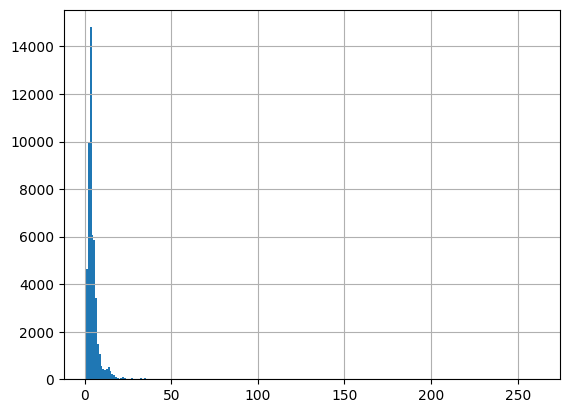

In [30]:
df["price"].dropna().hist(bins=250)

In [31]:
mean_price = df["price"].mean()
std_price = df["price"].std()
random_values = np.random.normal(mean_price, std_price, df["price"].isnull().sum())
while any(random_values < 0):
    random_values[random_values < 0.01] = np.random.normal(mean_price, std_price, (random_values < 0.01).sum())
df.loc[df["price"].isnull(), "price"] = random_values

C:\Users\venki\AppData\Local\Temp\ipykernel_9232\190608111.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 6.52067671 11.57337169 15.90354792 ... 10.77252629  6.22952956
  5.65153649]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df.loc[df["price"].isnull(), "price"] = random_values


<Axes: >

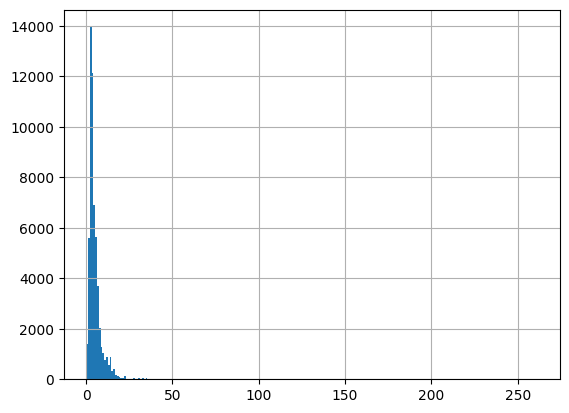

In [32]:
df["price"].dropna().hist(bins=250)

In [33]:
avg_price = df.groupby('ISBN')['price'].mean().reset_index()
avg_price.rename(columns={'price': 'average_price'}, inplace=True)

df = df.merge(avg_price, on='ISBN', how='left')
df.drop(columns=['price'], inplace=True)

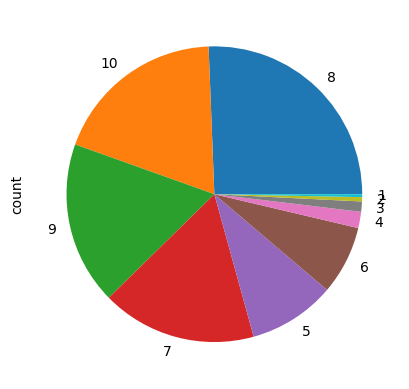

In [34]:
df["Book-Rating"].value_counts().plot(kind="pie")
plt.show()

Most of the available user reviews are positive.

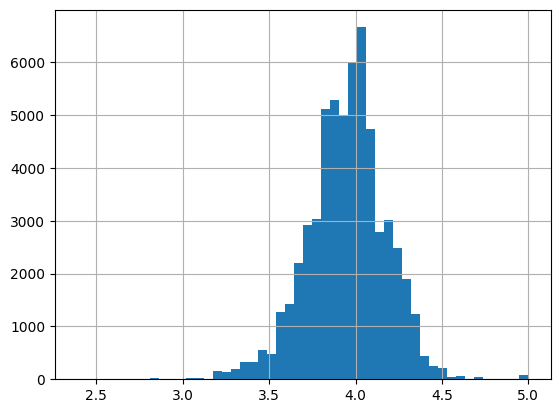

In [35]:
df["rating"].hist(bins=50)
plt.show()

Most of the overall books available are positively reviewed generally.

In [36]:
df["Publisher"].value_counts()

Publisher
Ballantine Books            3921
Warner Books                2908
Berkley Publishing Group    2645
Pocket                      2446
Dell                        2272
                            ... 
Servant Pubns                  1
Authorlink                     1
Irwin Pub                      1
Quartet Books                  1
Gold Leaf Press (WA)           1
Name: count, Length: 1119, dtype: int64

In [37]:
df.drop(columns=["Publisher"], axis=1, inplace=True)

In [38]:
df

,User-ID,ISBN,Book-Rating,title,author,rating,description,pages,awards,numRatings,...,Adult Fiction,Literature,Mystery Thriller,Crime,Audiobook,Historical,Adventure,Science Fiction,Young Adult,average_price
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells (Goodreads Author),3.57,Little Altars Everywhere is a national best-se...,288,0,28611,...,1,0,0,0,0,1,0,0,0,3.39000
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan (Goodreads Author),3.98,The story of friendship between four African A...,448,0,14718,...,1,0,0,0,0,0,0,0,0,0.89000
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,4.09,Published to international critical and popula...,483,1,68404,...,0,1,0,0,0,1,0,0,0,3.33000
3,276755,0451166892,5,The Pillars of the Earth,Ken Follett (Goodreads Author),4.31,Ken Follett is known worldwide as the master o...,976,0,648793,...,0,1,0,0,1,1,0,0,0,6.66651
4,276762,0380711524,5,See Jane Run,Joy Fielding,3.92,What do you do when you don't know who you are...,416,0,8008,...,1,0,1,1,0,0,0,0,0,2.86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58532,276681,0060938455,9,Fast Food Nation: The Dark Side of the All-Ame...,Eric Schlosser,3.75,Fast food has hastened the malling of our land...,399,1,197560,...,0,0,0,0,0,0,0,0,0,3.09000
58533,276688,0553566040,6,Missing Joseph,Elizabeth George (Goodreads Author),3.96,Deborah and Simon St. James have taken a holid...,576,0,11641,...,0,1,1,1,0,0,0,0,0,7.51000
58534,276688,0553575104,6,In Pursuit of the Proper Sinner,Elizabeth George (Goodreads Author),4.10,A theatrical producer shoots himself on the ni...,718,0,12659,...,0,1,1,1,1,0,0,0,0,2.86000
58535,276688,0684804484,10,No Ordinary Time: Franklin and Eleanor Rooseve...,Doris Kearns Goodwin,4.18,"Winner of the Pulitzer for History, No Ordinar...",633,2,40982,...,0,0,0,0,0,1,0,0,0,7.08000


In [39]:
df["author"].value_counts()

author
John Grisham (Goodreads Author)       1840
Michael Crichton                      1205
Stephen King (Goodreads Author)       1021
Dean Koontz (Goodreads Author)         745
Nicholas Sparks (Goodreads Author)     638
                                      ... 
Kay Arthur                               1
Lynessa Layne (Goodreads Author)         1
Aral Bereux                              1
Thomas Sowell                            1
Ann Tatlock                              1
Name: count, Length: 4518, dtype: int64

In [ ]:
df["author"].replace(to_replace="\(Goodreads Author\)", value="", regex=True, inplace=True)

In [41]:
df["author"].value_counts()

author
John Grisham        1840
Michael Crichton    1205
Stephen King        1021
Dean Koontz          745
Nicholas Sparks      638
                    ... 
Kay Arthur             1
Lynessa Layne          1
Aral Bereux            1
Thomas Sowell          1
Ann Tatlock            1
Name: count, Length: 4518, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58537 entries, 0 to 58536
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              58537 non-null  int64  
 1   ISBN                 58537 non-null  object 
 2   Book-Rating          58537 non-null  int64  
 3   title                58537 non-null  object 
 4   author               58537 non-null  object 
 5   rating               58537 non-null  float64
 6   description          58334 non-null  object 
 7   pages                58121 non-null  object 
 8   awards               58537 non-null  int64  
 9   numRatings           58537 non-null  int64  
 10  likedPercent         58533 non-null  float64
 11  bbeScore             58537 non-null  int64  
 12  bbeVotes             58537 non-null  int64  
 13  Year-Of-Publication  58537 non-null  int64  
 14  Fiction              58537 non-null  int64  
 15  Novels               58537 non-null 

In [43]:
def contains_letter(x):
    if isinstance(x, str) and re.search('[a-zA-Z]', x):
        return np.nan
    return x

df["pages"] = df["pages"].apply(contains_letter)

In [44]:
df["pages"] = df["pages"].astype("Int64")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58537 entries, 0 to 58536
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              58537 non-null  int64  
 1   ISBN                 58537 non-null  object 
 2   Book-Rating          58537 non-null  int64  
 3   title                58537 non-null  object 
 4   author               58537 non-null  object 
 5   rating               58537 non-null  float64
 6   description          58334 non-null  object 
 7   pages                58120 non-null  Int64  
 8   awards               58537 non-null  int64  
 9   numRatings           58537 non-null  int64  
 10  likedPercent         58533 non-null  float64
 11  bbeScore             58537 non-null  int64  
 12  bbeVotes             58537 non-null  int64  
 13  Year-Of-Publication  58537 non-null  int64  
 14  Fiction              58537 non-null  int64  
 15  Novels               58537 non-null 

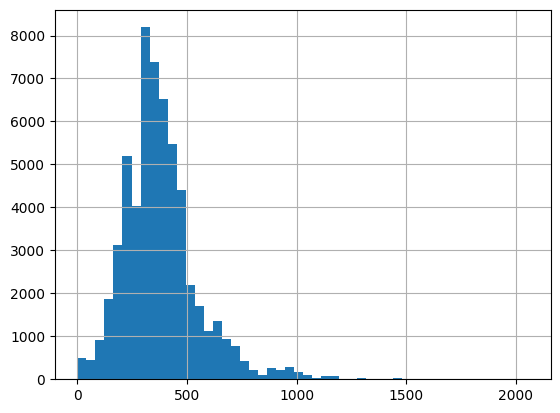

In [46]:
df["pages"].hist(bins=50)
plt.show()

In [47]:
mean_pages = df["pages"].mean()
std_pages = df["pages"].std()
random_values = np.round(np.random.normal(mean_pages, std_pages, df["pages"].isnull().sum()))
while any(random_values < 1):
    random_values[random_values < 1] = np.round(np.random.normal(mean_pages, std_pages, (random_values < 1).sum()))
df.loc[df["pages"].isnull(), "pages"] = random_values

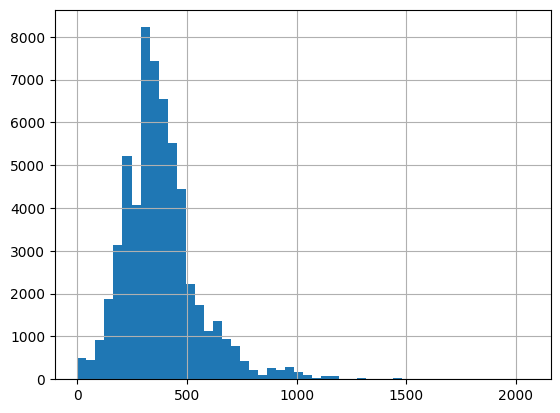

In [48]:
df["pages"].hist(bins=50)
plt.show()

In [49]:
df.to_csv("data/preprocessed_books.csv", index=False)